In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from numpy import fft
from scipy.interpolate import interp1d
import importlib

from source import plots
from source import prob_dists as pd


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b640df0>)

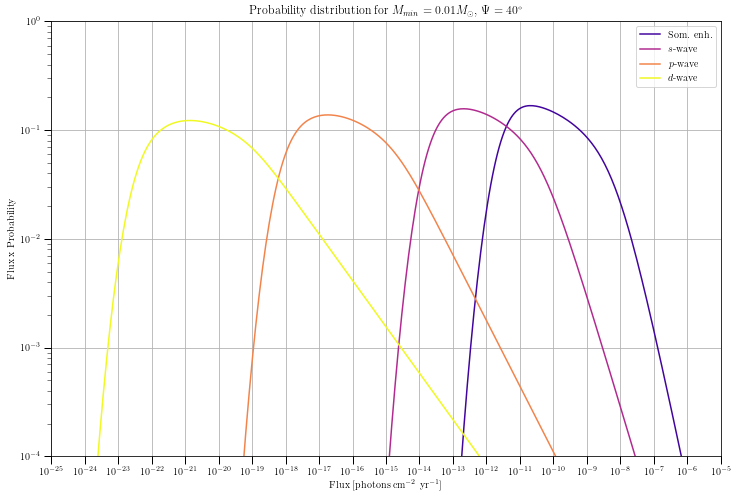

In [2]:
plots.p1_plot({})

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12db05e80>)

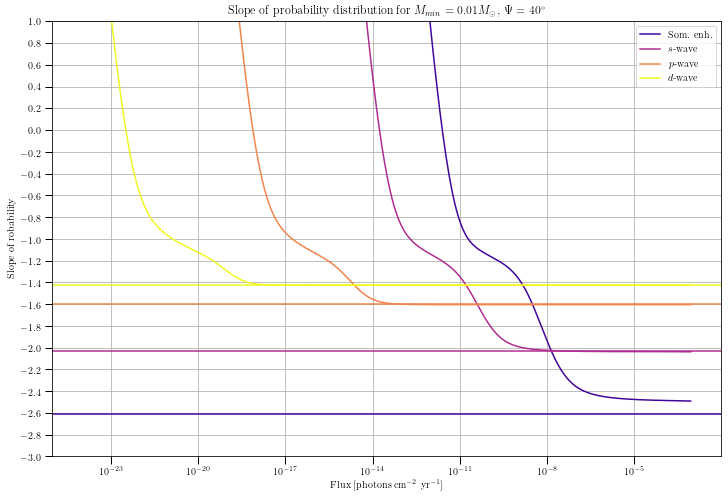

In [3]:
plots.p1_slope_plot({})

In [4]:
importlib.reload(pd)
n = -1

params = {'R_G': 220, # Kpc
          'd_solar': 8.5, # kpc
          'psi': 40,
          'M_min': 1.0e-2, # Msun
          'M_max': 1.0e10, # Msun
          'fwimp': 1.0,
          'mean_params': {'a':77.4, 'b':0.87+0.31*n, 'c':-0.23-0.04*n},
          'nside': 2048,
          'area_fermi': 2000.0, # cm^2
          'n': n,
          'log_flux_min': -14, # log10 photons/cm^2/yr
          'log_flux_max': -5, # log10 photons/cm^2/yr
          'N': 10000,
          'log_k_min': 2,
          'log_k_max': 14,
          'N_k': 10000,
          'psh_log_f_min': -6,
          'psh_log_f_max': -4,
          'N_psh': 500
         }

params['omega_pixel'] = 4.*np.pi/(12*params['nside']**2.) # sr
p = params

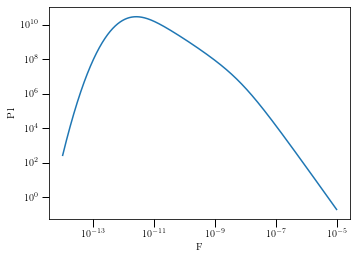

In [5]:
fluxes = np.logspace(p['log_flux_min'], p['log_flux_max'], num=p['N'])
p1_vals = pd.p1(fluxes, **p)
fig, _ = plots.check_p1_plot(fluxes, p1_vals)

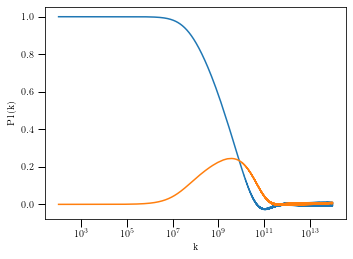

In [6]:
muu = pd.mu(**p)
ft_p1_vals, k = pd.ft_p1(p1_vals, fluxes, **p)
fig, _ = plots.check_ft_p1_plot(k, ft_p1_vals)


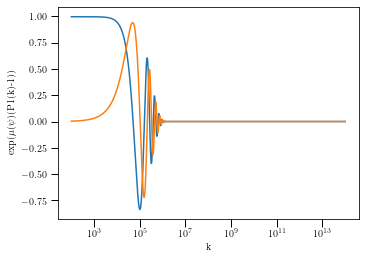

In [7]:
fig, _ = plots.check_psh_integrand_plot(k, ft_p1_vals, muu)

In [8]:
pf_vals, flux = pd.pf(muu, ft_p1_vals, k, **p)

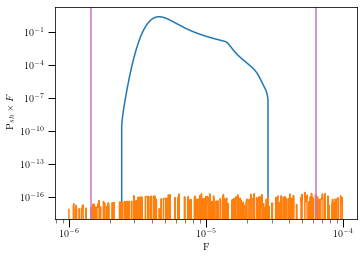

In [9]:
startl = 40
limi = -50
fig, _ = plots.check_psh_plot(flux, pf_vals, j=[startl, limi])

In [10]:
print(f'\mu \int F P1: {(muu * integrate.simps(fluxes * p1_vals, fluxes))}')
print(f' \int F Psh: {integrate.simps(pf_vals[startl:limi].real * flux[startl:limi], flux[startl:limi])}')


\mu \int F P1: [4.99440328e-06]
 \int F Psh: 4.9795594192936875e-06


Got P1(F) values
inferred log_k_max 7.00000000000261
Finished FT of P1
Finished Psh computation
\mu \int F P1: 4.994406757171895e-06
 \int F Psh: 4.979704560301804e-06
percent error = -0.29%



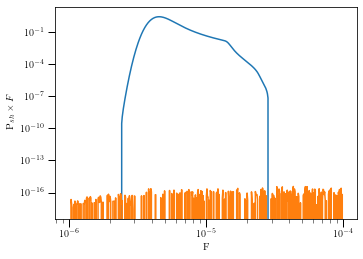

In [11]:
pshvals, fxs = pd.psh(params, plot=True, infer_values=True)

 \int F Psh: 4.979633749233517e-06


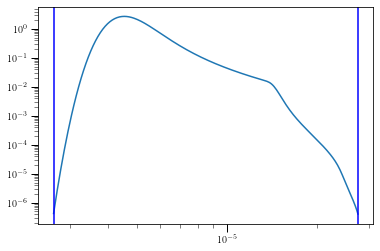

In [12]:
plt.plot(fxs, fxs * pshvals.real)
ax = plt.gca()
startl = 0
limi = -1
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(fxs[startl], color='b')
ax.axvline(fxs[limi], color='b')

print(f' \int F Psh: {integrate.simps(pshvals[startl:limi].real * fxs[startl:limi], fxs[startl:limi])}')


Angle: 40.0
Got P1(F) values
inferred log_k_max 7.00000000000261
Finished FT of P1
Finished Psh computation
\mu \int F P1: 4.994406757171895e-06
 \int F Psh: 4.979704560301804e-06
percent error = -0.29%

Angle: 52.5
Got P1(F) values
inferred log_k_max 7.000000000002633
Finished FT of P1
Finished Psh computation
\mu \int F P1: 3.7891249996220987e-06
 \int F Psh: 3.779027145346735e-06
percent error = -0.27%

Angle: 65.0
Got P1(F) values
inferred log_k_max 7.000000000002654
Finished FT of P1
Finished Psh computation
\mu \int F P1: 3.007759216060674e-06
 \int F Psh: 3.000463651962436e-06
percent error = -0.24%

Angle: 77.5
Got P1(F) values
inferred log_k_max 7.000000000002682
Finished FT of P1
Finished Psh computation
\mu \int F P1: 2.473939742639097e-06
 \int F Psh: 2.4684466140338693e-06
percent error = -0.22%

Angle: 90.0
Got P1(F) values
inferred log_k_max 7.00000000000271
Finished FT of P1
Finished Psh computation
\mu \int F P1: 2.096716270238456e-06
 \int F Psh: 1.4994139765994e-06
p

[Text(1, 0, '40.0'),
 Text(1, 0, '50.0'),
 Text(1, 0, '60.0'),
 Text(1, 0, '70.0'),
 Text(1, 0, '80.0'),
 Text(1, 0, '90.0')]

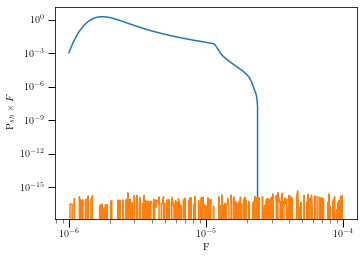

In [15]:
numnum = 5
psis = np.linspace(40, 90, num=numnum)
colors = cm.viridis(np.linspace(0, 1, num=numnum))

fig, ax = plt.subplots()

psh_vals_over_psi = []

for psi, col in zip(psis, colors):
    p['psi'] = psi
    print('Angle:', psi)
    pshvals, fxs = pd.psh(params, plot=True, infer_values=True)
    
    psh_vals_over_psi.append((pshvals, fxs))
    
    ax.plot(fxs, fxs * pshvals.real, label=rf"{psi}$^\circ$", color=col)
   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F')
ax.set_ylabel('F x Psh')
cbarlabs = np.arange(min(psis), max(psis)+1, step=10)
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis), ticks=np.linspace(0, 1, num=len(cbarlabs)))
cbar.set_label(r'$\psi$[$^\circ$]', rotation=270)
cbar.ax.set_yticklabels(cbarlabs)

In [16]:
fig
fig.savefig('./output/psh_n-1.png')

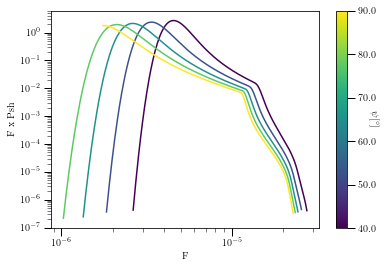

In [17]:
fig